In [11]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# P. Cortez e A. Silva. Usando a Mineração de Dados para Prever o Desempenho do Aluno do Ensino Médio. Em A. Brito e J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, abril de 2008, EUROSIS, ISBN 978-9077381-39-7.
dataset = pd.read_csv("../../datasets/highschoolAlcoholPerformace/student-lpor.csv")
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,10,10


In [16]:
columns = dataset.columns
columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2'],
      dtype='object')


    school: Student's school (binary: GP (Gabriel Pereira) or MS (Mousinho da Silveira))
    sex: Student's sex (binary: 'F' - female or 'M' - male)
    age: Student age (numeric: 15 to 22)
    address: Type of student's residential address (binary: 'U' - urban or 'R' - rural)
    famsize: Family size (binary: 'LE3' - less than or equal to 3 or 'GT3' - greater than 3)
    Pstatus: Parents' cohabitation status (binary: 'T' - living together or 'A' - separated)
    Medu: Mother's education level (0 - none, 1 - Elementary School 1, 2 - Elementary School 2, 3 - High School or 4 - Higher Education)
    Fedu: Father's education level (0 - none, 1 - Elementary School 1, 2 - Elementary School 2, 3 - High School or 4 - Higher Education)
    Mjob: Mother's job (nominal: teacher, health, services, at_home or Other)
    Fjob: Father's job (nominal: teacher, health, services, at_home or Other)
    reason: Reason for choosing this school (nominal: home, reputation, course or other)
    guardian: Student's guardian (nominal: mother, father or other)
    traveltime: Travel time from home to school (time intervals: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour or 4 - >1 hour )
    studytime: Weekly study time (time intervals: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours or 4 - >10 hours)
    schoolsup: Extra educational support (binary: yes or no)
    famsup: Family educational support (binary: yes or no)
    paid: Private classes on subjects related to the course (binary: yes or no)
    activities: Performs extracurricular activities (binary: yes or no)
    nursery: Attended daycare (binary: yes or no)
    higher: Desire to pursue a degree (binary: yes or no)
    internet: Internet access at home (binary: yes or no)
    romantic: Are you in a romantic relationship (binary: yes or no)
    famrel: Quality of family relationships (categorical: from 1 - very bad to 5 - excellent)
    freetime: Free time after school (categorical: from 1 - very low to 5 - very high)
    goout: Time with friends (categorical: from 1 - very low to 5 - very high)
    Dalc: Alcohol consumption on the work day (categorical: from 1 - very low to 5 - very high)
    Walc: Alcohol consumption on the weekend (categorical: from 1 - very low to 5 - very high)
    health: Current health status (categorical: from 1 - very bad to 5 - very good)
    absences: Number of school absences (numeric: from 0 to 93)
    G1: First semester grade (numeric: from 0 to 20)
    G2: Second semester grade (numeric: from 0 to 20)


Since thare are so many columns, we must vizualize them in terms of performace and consume to see which ones are usefull

/tmp/ipykernel_33152/2814068129.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


<Axes: >

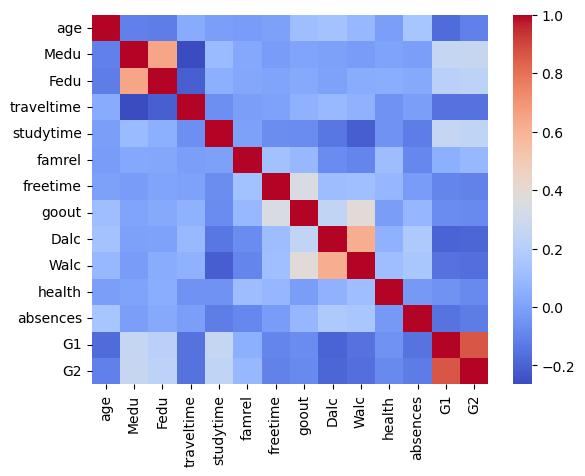

In [13]:
correlation = dataset.corr()
sns.heatmap(correlation, cmap="coolwarm")

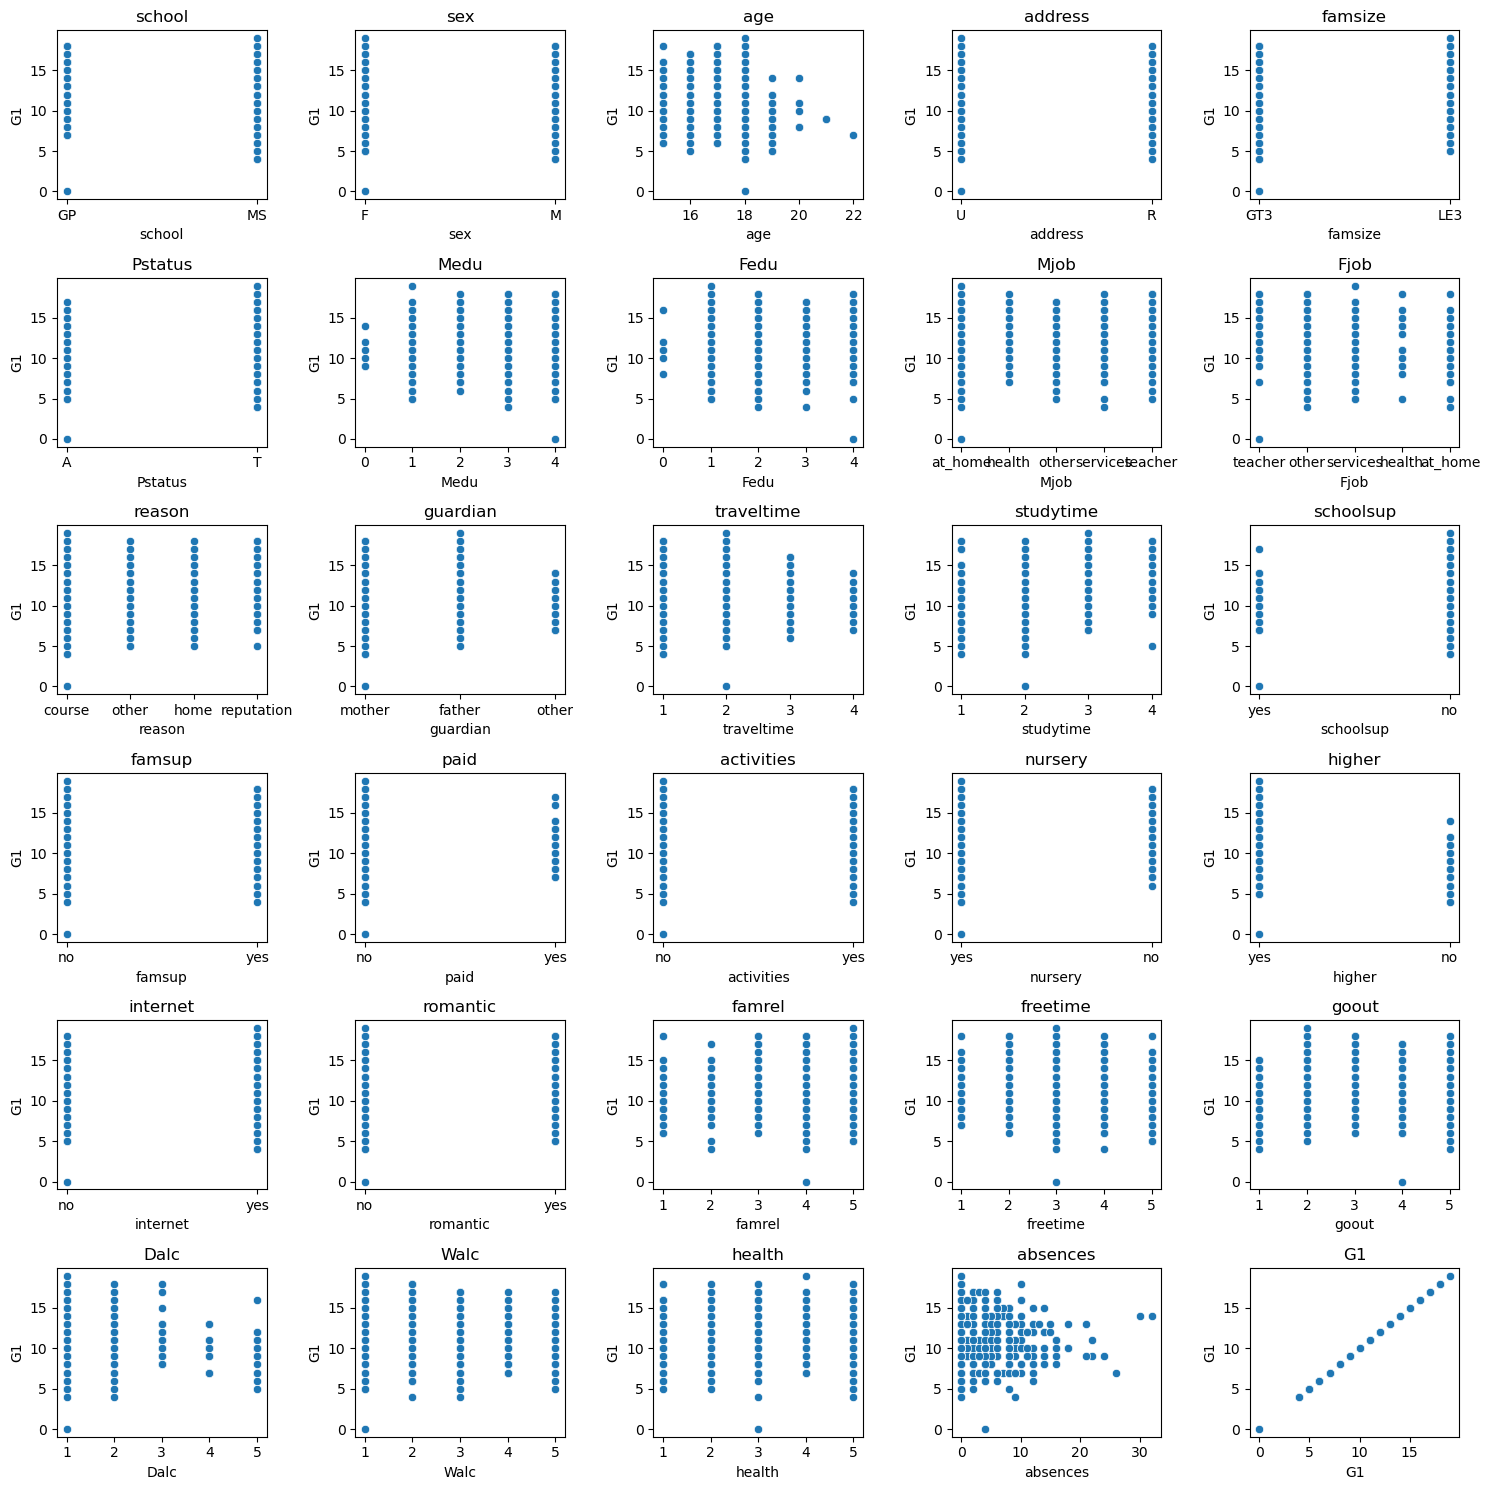

In [45]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))
index = 0
for i in range(6):
    for j in range(5):
        x = columns[index]
        sns.scatterplot(x=x, y=dataset["G1"], markers=".", data=dataset, ax=axes[i, j])
        axes[i, j].set_title(x)
        index += 1
    plt.tight_layout()

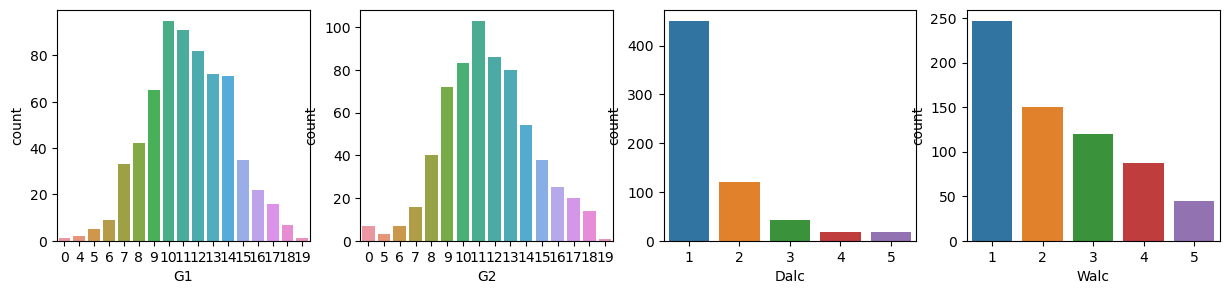

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
sns.countplot(x="G1", data=dataset, ax=axes[0])
sns.countplot(x="G2", data=dataset, ax=axes[1])
sns.countplot(x="Dalc", data=dataset, ax=axes[2])
sns.countplot(x="Walc", data=dataset, ax=axes[3])

plt.show()